In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from bonus import covariates

n_modes = 4
run = 2

BASE_DIR = "//sum-lpnc-nas.u-ga.fr/SecureVault/LPNC-SecureVault/MEGAGING/Processed/osl_processing"
# BASE_DIR = "/run/user/1001/gvfs/smb-share:server=sum-lpnc-nas.u-ga.fr,share=securevault/LPNC-SecureVault/MEGAGING/Processed/osl_processing"
OUTPUT_DIR = f"{BASE_DIR}/train_dynemo_1_90/{n_modes:02d}_modes/run{run:02d}/inf_params"

# Demographics
age_group_dict = {
    'bm_014': 1, # young
    'ca_001': 1,
    'ca_019': 2, # old
    'cc_007': 2,
    'cm_013': 2,
    'dm_022': 1,
    'el_018': 1,
    'gb_020': 2,
    'gh_017': 1,
    'gp_011': 2,
    'gv_005': 2,
    'lf_012': 2,
    'lr_008': 1,
    'pe_009': 1,
    'pl_016': 1,
    'pr_015': 2,
    'ra_003': 1,
    're_002': 1,
    'sg_010': 1
}
age = np.array(list(age_group_dict.values()))


# Reorder subjects
subject_list = list(age_group_dict.keys()) # Order by which epochs are sorted in dim 0
sorted_subject_list = sorted(subject_list, key=lambda x: int(''.join(filter(str.isdigit, x))))

# Separate subjects into two lists by age group
young_subjects = [name for name in sorted_subject_list if age_group_dict[name] == 1]
old_subjects = [name for name in sorted_subject_list if age_group_dict[name] == 2]

young_indices = [subject_list.index(name) for name in young_subjects]
old_indices = [subject_list.index(name) for name in old_subjects]

Temporal domain

In [5]:
# Load GMM-tresholded, baseline corrected evoked mode time courses
epochs = pickle.load(open(f"{OUTPUT_DIR}/epoched_dynemo_gmm.pkl", "rb")) #n_subjects, n_samples, n_modes

Bonferroni correction for 4 modes ...
After Bonferroni correction: Found 0 clusters


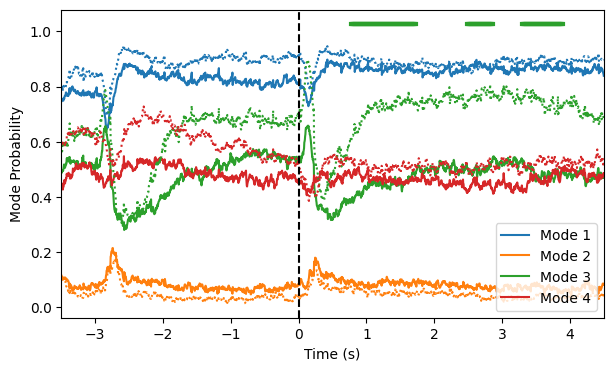

In [6]:
from bonus.super_funcs import get_time_cluster_indices, plot_evoked_response_with_clusters_indices_group_diff

# Young versus Old Permutations
clu_idx_list = get_time_cluster_indices(
    time_data=epochs,
    pooled_dims=(1,), # Pooling over time dimensions for each mode
    group_assignments=age, # young is group 1, old is group 2,
    contrast_idx=0,  # contrast is group 2 - group 1
    n_perm=5000,
    cft=3,
    bonferroni_ntest=n_modes,
    covariates={"Sex": covariates.sex,
                "TIV": covariates.TIV,
                },
)
    
plot_evoked_response_with_clusters_indices_group_diff(
        t=np.linspace(-3.5, 4.5, 2001),
        epochs_group1=np.mean(epochs[young_indices], axis=0),
        epochs_group2=np.mean(epochs[old_indices], axis=0),
        cluster_indices=clu_idx_list,
        labels=[f"Mode {i + 1}" for i in range(n_modes)],
        x_label="Time (s)",
        y_label="Mode Probability",
        legend_loc=4,
        linestyle=":",
        filename = f"{OUTPUT_DIR}/timecourse_cluster_young_vs_old.svg"
)

Spectral domain

In [7]:
# Load data
f = np.load(f"{OUTPUT_DIR}/f.npy")[:80] # Nothing after 40Hz
psd = np.load(f"{OUTPUT_DIR}/psd.npy")
coh = np.load(f"{OUTPUT_DIR}/coh.npy")
w = np.load(f"{OUTPUT_DIR}/w.npy")
idx_parcels=np.load(f"{OUTPUT_DIR}/idx_parcels_power.npy") # For selecting most-powered channels

psd_coefs = psd[:, 0] # Discarding the interpect term which corresponds to the static spectra

Plotting State 1
Permuting contrast <class 'glmtools.design.Contrast'>(GroupDiff,Differential) with mode=row-shuffle
	Computing 5000 permutations
	Finding clusters in ['Frequency'] dimensions
Bonferroni correction for 4 modes ...
After Bonferroni correction: Found 0 clusters
Plotting State 2
Permuting contrast <class 'glmtools.design.Contrast'>(GroupDiff,Differential) with mode=row-shuffle
	Computing 5000 permutations
	Finding clusters in ['Frequency'] dimensions
Bonferroni correction for 4 modes ...
After Bonferroni correction: Found 0 clusters
Plotting State 3
Permuting contrast <class 'glmtools.design.Contrast'>(GroupDiff,Differential) with mode=row-shuffle
	Computing 5000 permutations
	Finding clusters in ['Frequency'] dimensions
Bonferroni correction for 4 modes ...
After Bonferroni correction: Found 0 clusters
Plotting State 4
Permuting contrast <class 'glmtools.design.Contrast'>(GroupDiff,Differential) with mode=row-shuffle
	Computing 5000 permutations
	Finding clusters in ['Fre

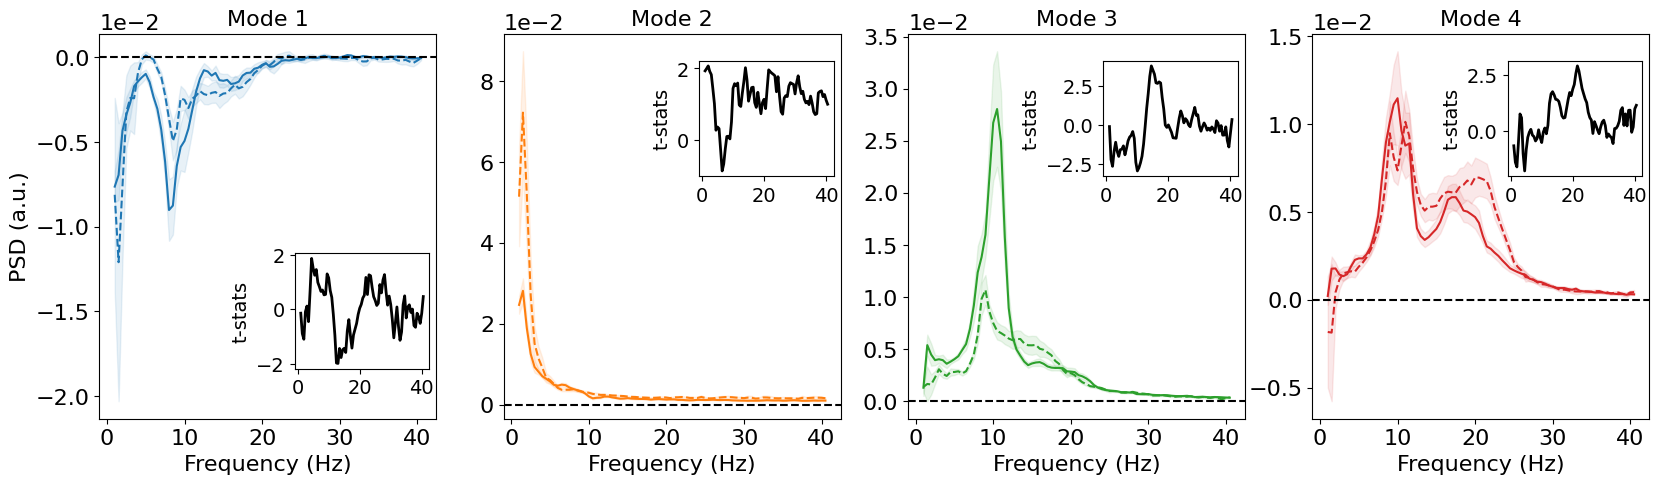

In [8]:
from bonus.super_funcs import plot_spectra_with_clusters_indices

psd_coefs_reordered=np.ones_like(psd_coefs)
for mode in range(n_modes):
    psd_coefs_reordered[:,mode]=psd_coefs[:,mode,idx_parcels[mode]] # Reordering according to the power index

plot_spectra_with_clusters_indices(
    f, 
    psd_coefs_reordered[:,:,-10:, :80], # 10 most-powered channels for each mode
    group_assignments=age, # young is group 1, old is group 2
    n_perm=5000,
    contrast_idx=0, # contrast is group 2 - group 1
    cft=2,
    bonferroni_ntest=n_modes,
    covariates={"Sex": covariates.sex,
                "TIV": covariates.TIV,
            },
    filename = f"{OUTPUT_DIR}/PSD_cluster_young_vs_old.svg",
)

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
2024-10-09 18:00:31 INFO nibabel.global [batteryrunners.py:268:log_raise]: pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Plotting Mode 1
Permuting contrast <class 'glmtools.design.Contrast'>(GroupDiff,Differential) with mode=row-shuffle
	Computing 5000 permutations
	Finding clusters in ['Channels'] dimensions
Bonferroni correction for 4 modes ...
After Bonferroni correction: Found 0 clusters
Plotting Mode 2
Permuting contrast <class 'glmtools.design.Contrast'>(GroupDiff,Differential) with mode=row-shuffle
	Computing 5000 permutations
	Finding clusters in ['Channels'] dimensions
Bonferroni correction for 4 modes ...
After Bonferroni correction: Found 0 clusters
Plotting Mode 3
Permuting contrast <class 'glmtools.design.Contrast'>(GroupDiff,Differential) with mode=row-shuffle
	Computing 5000 permutations
	Finding clusters in ['Channels'] dimensions
Bonferroni correction for 4 modes ...
After Bonferroni correction: Found 0 clusters
Plotting Mode 4
Permuting contrast <class 'glmtools.design.Contrast'>(GroupDiff,Differential) with mode=row-shuffle
	Computing 5000 permutations
	Finding clusters in ['Channels']

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
2024-10-09 18:02:01 INFO nibabel.global [batteryrunners.py:268:log_raise]: pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Bonferroni correction for 4 modes ...
After Bonferroni correction: Found 0 clusters


Saving images:   0%|          | 0/1 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
2024-10-09 18:02:01 INFO nibabel.global [batteryrunners.py:268:log_raise]: pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Saving images:   0%|          | 0/1 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
2024-10-09 18:02:02 INFO nibabel.global [batteryrunners.py:268:log_raise]: pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Saving images:   0%|          | 0/1 [00:00<?, ?it/s]

pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1
2024-10-09 18:02:02 INFO nibabel.global [batteryrunners.py:268:log_raise]: pixdim[0] (qfac) should be 1 (default) or -1; setting qfac to 1


Saving images:   0%|          | 0/1 [00:00<?, ?it/s]

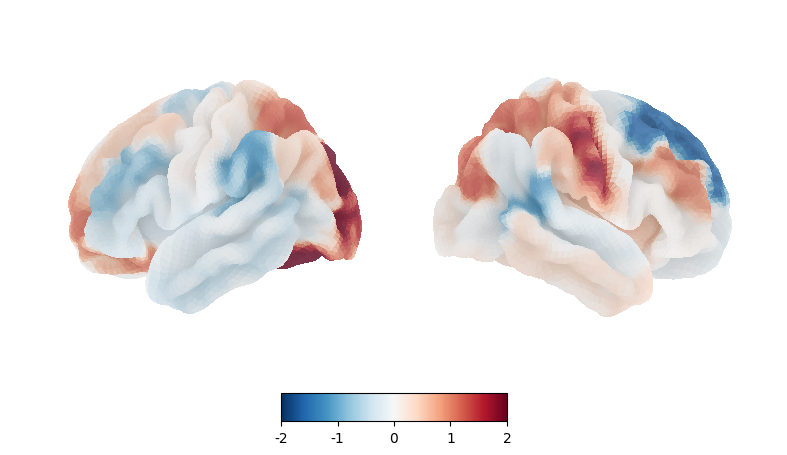

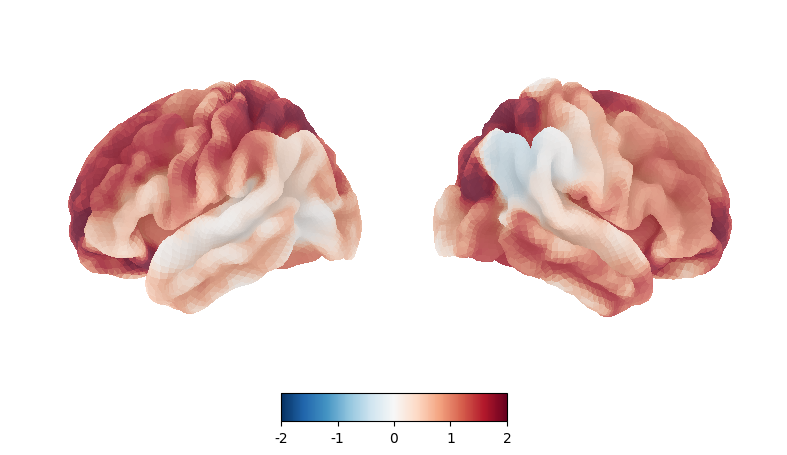

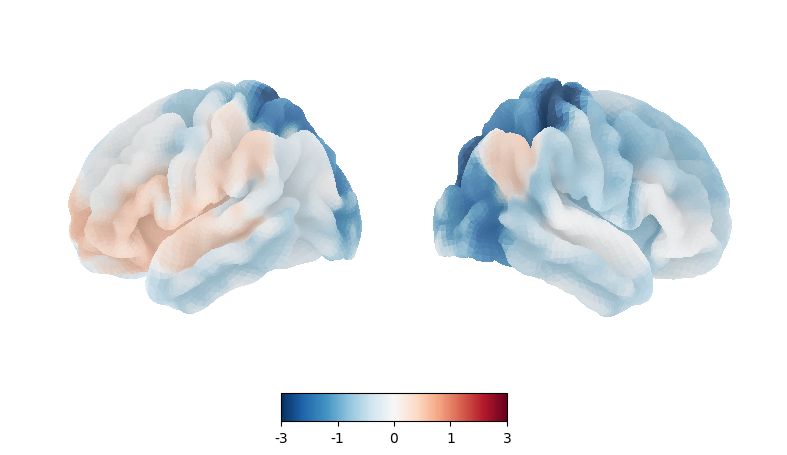

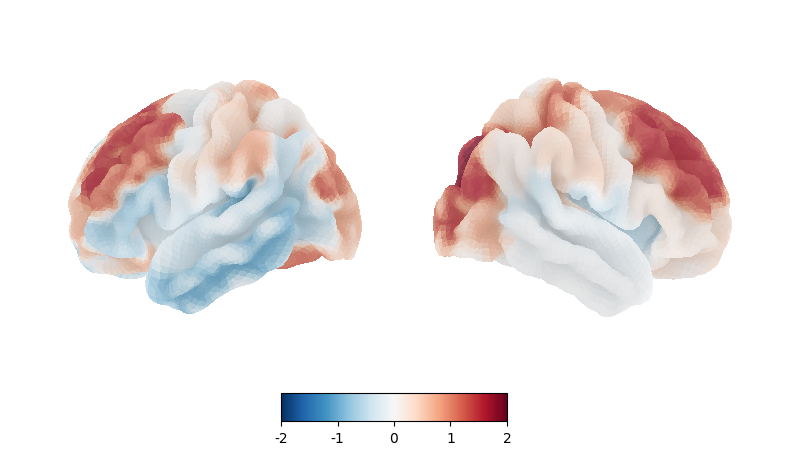

In [9]:
from osl_dynamics.analysis import power
from osl_dynamics.utils.parcellation import Parcellation
from bonus.super_funcs import plot_spatial_with_clusters_indices

pow = power.variance_from_spectra(f, psd_coefs)

roi_centers = Parcellation("Glasser52_binary_space-MNI152NLin6_res-8x8x8.nii.gz").roi_centers()
order = np.argsort(roi_centers[:, 1]) # Anterior-to-Posterior reordering of the parcels

plot_spatial_with_clusters_indices(
    pow,
    AP_order=order, # A-P contiguity for clustering
    group_assignments=age, # young is group 1, old is group 2
    n_perm=5000,
    contrast_idx=0, # contrast is group 2 - group 1
    cft=2,
    bonferroni_ntest=n_modes,
    covariates={"Sex": covariates.sex,
                "TIV": covariates.TIV,
            },
)